In [1]:
# Common imports
import pandas as pd
import numpy as np
import scipy as sp

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['#0000aa', '#ff2020'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import mglearn

## 1 分类变量（Categorical Variables）

**One-hot编码（虚拟变量）**

One-Hot-Encoding (Dummy variables)

将数据转换成分类变量有两种方法：
1. pandas
2. sklearn

In [2]:
from IPython.display import display

In [3]:
# 文件中没有含有名称的表头，因此header=None
# 在names中显示地提供列名称
data = pd.read_csv(
    'adult.data', header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# display可以在notebook中输出漂亮的格式
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


将数据集中的label提取出来：

In [4]:
X = data.iloc[:, :-1]

In [5]:
y = data['income']

需要检查数据中的分类变量（类别是一样的）：

**检查列的内容一个好方法是pandas中的Series的`value_counts`函数。**

In [6]:
X['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [7]:
X['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

> 实际中，应该这样检查所有的列以便确定是有意义的分类数据。

In [8]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [9]:
X.shape

(32561, 14)

**使用`pd.get_dummies()`转换数据**

In [10]:
X_dummies = pd.get_dummies(X)

In [11]:
X_dummies.shape

(32561, 108)

In [12]:
X_dummies.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=108)

连续特征没有变化，分类特征的每个可能取值都被扩展成一个新特征。

**`pd.get_dummies()`函数将所有数字看作是连续的，不会为其创建虚拟变量。为解决这个问题可以使用`OneHotEncoder`，指定哪些变量是连续的，哪些变量是离散的。也可以将数据框中的数值列转换为字符串。**

In [13]:
demo_df = pd.DataFrame({"integer feature": [0, 1, 2, 1],
                       "categorical feature": ['s', 'f', 's', 'b']})
display(demo_df)

,categorical feature,integer feature
0,s,0
1,f,1
2,s,2
3,b,1


**使用`pd.get_dummies`只会编码字符串，不会改变整数特征。**

In [14]:
pd.get_dummies(demo_df)

,integer feature,categorical feature_b,categorical feature_f,categorical feature_s
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


可以显示地指定想要编码的列：

In [15]:
pd.get_dummies(demo_df, columns=demo_df.columns)

,categorical feature_b,categorical feature_f,categorical feature_s,integer feature_0,integer feature_1,integer feature_2
0,0,0,1,1,0,0
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,1,0,0,0,1,0


**`OneHotEncoder`实现的编码与`pd.get_dummies`相同，但目前只能用于值为整数的分类变量。**

In [16]:
X = np.array([[0, 0, 3],
              [1, 1, 0],
              [0, 2, 1],
              [1, 0, 2]])

In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder()
X_one_hot_enc = one_hot_enc.fit_transform(X)

In [18]:
X_one_hot_enc

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [19]:
# 可以在OneHotEncoder中使用sparse=False返回数组
X_one_hot_enc.toarray()

array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [20]:
# Maximum number of values per feature
one_hot_enc.n_values_

array([2, 3, 4])

In [21]:
# Indices to feature ranges
one_hot_enc.feature_indices_

array([0, 2, 5, 9], dtype=int32)

> `X_one_hot_enc.toarray()`的0-2(不含)个列为第一个特征，2-5(不含)为第二个特征，5-9(不含)为第三个特征。

## 2 分箱、离散化、线性模型与树

数据表示的最佳方法不仅取决于数据的语义，还取决于所使用的模型种类。

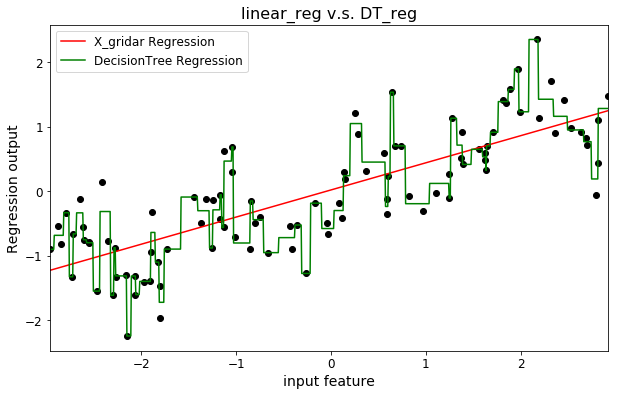

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# X.shape=(100, 1)
X, y = mglearn.datasets.make_wave(n_samples=100)
X_grid = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

linear_reg =  LinearRegression()
linear_reg.fit(X, y)

dt_reg = DecisionTreeRegressor(min_samples_split=3, random_state=42)
dt_reg.fit(X, y)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'ko')
plt.plot(X_grid, linear_reg.predict(X_grid), 'r', label="X_gridar Regression")
plt.plot(X_grid, dt_reg.predict(X_grid), 'g', label="DecisionTree Regression")
plt.legend(loc="best", fontsize='large')
plt.xlim(X.min(), X.max())
plt.xlabel("input feature", fontsize=14)
plt.ylabel("Regression output", fontsize=14)
plt.title("linear_reg v.s. DT_reg", fontsize=16)
plt.show()

线性模型只能对线性关系建模。决策树可以构建更为复杂的数据模型，但这强烈依赖于数据表示。

**有一种方法可以让线性模型在连续数据上变得更加强大，就是使用分箱（bining)/离散化（discretiza）将其划分为多个特征。**

将特征的输入范围划分成固定个数的箱子（bin），那么数据点就可以用它所在的箱子表示。

In [23]:
# 定义10个均匀分布的箱子(bin)
bins = np.linspace(np.floor(X.min()), np.ceil(X.max()), 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

将数据集X中单个连续输入特征变换为一个分类特征，用于表示数据点所在的bin：

In [24]:
# 记录每个点属于的bin
which_bin = np.digitize(X, bins)

In [25]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [26]:
which_bin[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]], dtype=int64)

然后利用`OneHotEncoder`将分类特征编码：

In [27]:
one_hot_enc = OneHotEncoder(sparse=False)
X_binned = one_hot_enc.fit_transform(which_bin)

In [28]:
X_binned[:5]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [29]:
X_binned.shape

(100, 10)

在one-hot编码后的数据上构建新的线性模型和新的决策树模型：

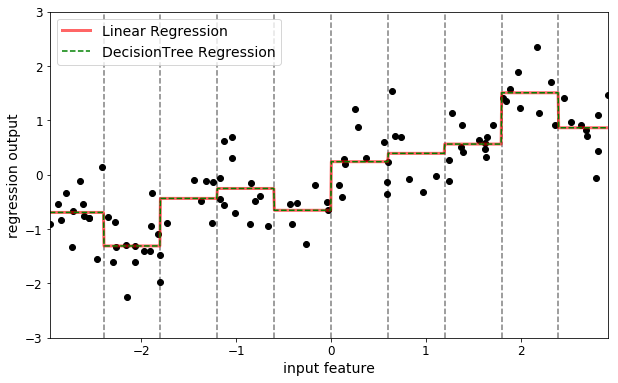

In [30]:
X_grid_binned = one_hot_enc.transform(np.digitize(X_grid, bins))

linear_reg = LinearRegression().fit(X_binned, y)
dt_reg = DecisionTreeRegressor(random_state=42).fit(X_binned, y)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'ko')
plt.plot(X_grid, linear_reg.predict(X_grid_binned), 'r', linewidth=3,
         alpha=.6, label="Linear Regression")
plt.plot(X_grid, dt_reg.predict(X_grid_binned), 'g--',
         label="DecisionTree Regression")
plt.vlines(bins, -3, 3, linestyle='--', color='grey')
plt.legend(loc="best", fontsize=14)
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.show()

> 对于每个箱子，二者预测的结果一样，都为一个常数值。因为每个bin内的特征是不变的，所以对于一个箱子内的所有点，任何模型都会预测相同的值。

## 3 交互特征和多项式特征

想要丰富的特征表示，特别是对线性模型而言，另一种方法是**添加原始数据的交互特征（interaction feature）和多项式特征（polynomial feature）**。

线性模型不仅可以学习偏移，还可以学习斜率。想要向分箱数据上的线性模型添加斜率，一种方法是重新加入原始特征。

In [31]:
X_combined = np.hstack((X, X_binned))

In [32]:
X_combined.shape

(100, 11)

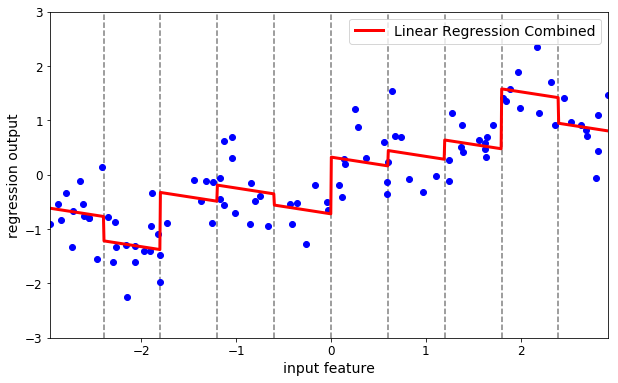

In [33]:
X_grid_binned = one_hot_enc.transform(np.digitize(X_grid, bins))
X_grid_combined = np.hstack((X_grid, X_grid_binned))

linear_reg = LinearRegression().fit(X_combined, y)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'bo')
plt.plot(X_grid, linear_reg.predict(X_grid_combined), 'r', linewidth=3,
         label="Linear Regression Combined")
plt.vlines(bins, -3, 3, linestyle='--', color='grey')
plt.legend(loc="best", fontsize=14)
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.show()

> 学到的斜率是向下的，并且在所有bin中都相同——只有一个X轴特征，也就只有一个斜率。斜率都是相同的，可能不是很有用。

希望**每个bin都有一个不同的斜率**。可以**添加交互特征或乘积特征，用来表示数据点所在的bin以及数据点在X轴上位置**。这个特征是bin指示符与原始特征的乘积。

In [34]:
X_product = np.hstack([X_binned, X * X_binned])
X_product.shape

(100, 20)

> 20个特征：数据点所在bin的指示符和原始特征与bin指示符的乘积。可以将乘积特征看作每个bin X轴特征的副本。它在bin内等于原始特征，在其他位置等于0。

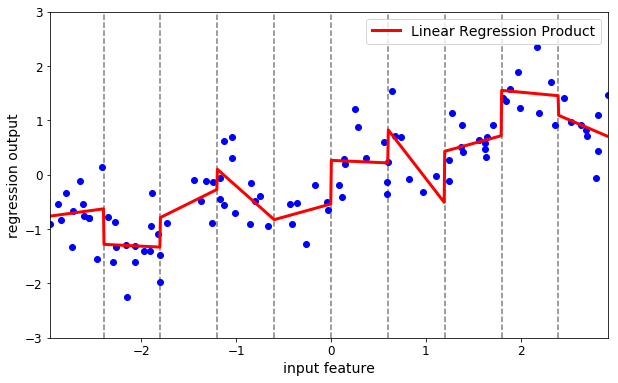

In [35]:
X_grid_binned = one_hot_enc.transform(np.digitize(X_grid, bins))
X_grid_product = np.hstack((X_grid_binned, X_grid * X_grid_binned))

linear_reg = LinearRegression().fit(X_product, y)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'bo')
plt.plot(X_grid, linear_reg.predict(X_grid_product), 'r', linewidth=3,
         label="Linear Regression Product")
plt.vlines(bins, -3, 3, linestyle='--', color='grey')
plt.legend(loc="best", fontsize=14)
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.show()

> 这个模型中每个bin都有自己的偏移和斜率。

**使用分箱**是**扩展连续特征**的一种方法。另一种方法是**使用原始的多项式**。

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# 包含直到x**10的多项式
# 默认的include_bias=True添加恒等于1的常数特征
poly_features = PolynomialFeatures(degree=10, include_bias=False)  # 不含常数特征
X_poly = poly_features.fit_transform(X)

In [37]:
X_poly.shape

(100, 10)

In [38]:
# 总输入特征数
poly_features.n_input_features_

1

In [39]:
# 总输出特征数
poly_features.n_output_features_

10

In [40]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [41]:
X_poly[:5]

array([[ -7.52759287e-01,   5.66646544e-01,  -4.26548448e-01,
          3.21088306e-01,  -2.41702204e-01,   1.81943579e-01,
         -1.36959719e-01,   1.03097700e-01,  -7.76077513e-02,
          5.84199555e-02],
       [  2.70428584e+00,   7.31316190e+00,   1.97768801e+01,
          5.34823369e+01,   1.44631526e+02,   3.91124988e+02,
          1.05771377e+03,   2.86036036e+03,   7.73523202e+03,
          2.09182784e+04],
       [  1.39196365e+00,   1.93756281e+00,   2.69701700e+00,
          3.75414962e+00,   5.22563982e+00,   7.27390068e+00,
          1.01250053e+01,   1.40936394e+01,   1.96178338e+01,
          2.73073115e+01],
       [  5.91950905e-01,   3.50405874e-01,   2.07423074e-01,
          1.22784277e-01,   7.26822637e-02,   4.30243318e-02,
          2.54682921e-02,   1.50759786e-02,   8.92423917e-03,
          5.28271146e-03],
       [ -2.06388816e+00,   4.25963433e+00,  -8.79140884e+00,
          1.81444846e+01,  -3.74481869e+01,   7.72888694e+01,
         -1.59515582e+02

可以用`get_feature_names`方法来获取特征的含义，给出每个特征的指数：

In [42]:
# 输出特征的特征名
poly_features.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

将多项式特征与线性回归模型一起使用，可以得到经典的**多项式回归（polynomial regression）**模型：

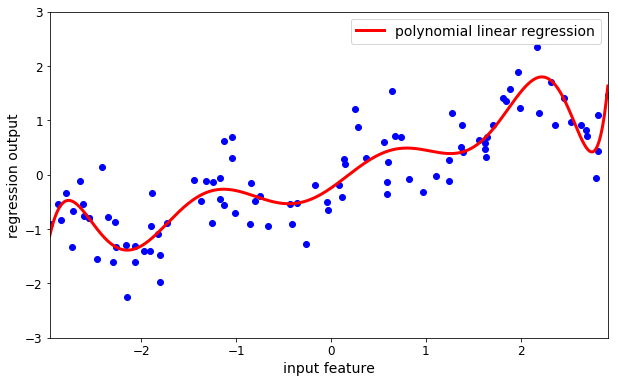

In [43]:
linear_reg = LinearRegression().fit(X_poly, y)

X_grid = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_grid_poly = poly_features.transform(X_grid)

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y, 'bo')
plt.plot(X_grid, linear_reg.predict(X_grid_poly), 'r', linewidth=3,
         label="polynomial linear regression")
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.show()

在原始数据中使用核SVM(没有任何变换）：

In [44]:
from sklearn.svm import SVR

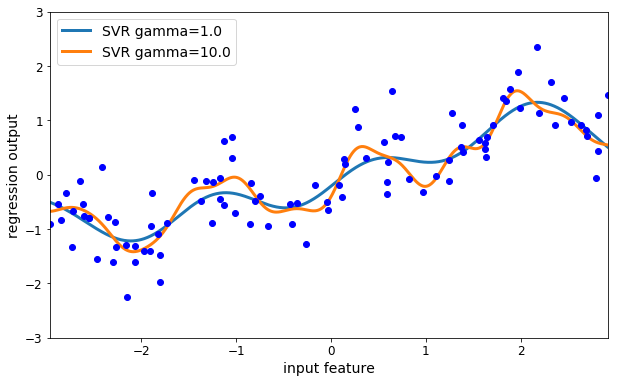

In [47]:
plt.figure(figsize=(10, 6))
X_grid = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
for gamma in [1., 10.]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(X_grid, svr.predict(X_grid), linewidth=3,
             label="SVR gamma={}".format(gamma))
plt.plot(X[:, 0], y, 'bo')
plt.xlim(X.min(), X.max())
plt.ylim(-3, 3)
plt.xlabel("input feature", fontsize=14)
plt.ylabel("regression output", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.show()

> 使用更为复杂的模型，能够学到一个与多项式回归的复杂度类似的预测结果。且不需要进行显示的特征变换。

Boston房价数据：

In [48]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [49]:
# return_X_Y=True, returns (data, target) instead of a Bunch object
X, y = load_boston(return_X_y=True)

In [52]:
print("shape of X: {}".format(X.shape))

shape of X: (506, 13)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
# 用MinMaxScaler缩放数据
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

提取多项式和交互式特征，次数最为2：

In [56]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [57]:
print("shape of X_train: {}".format(X_train.shape))
print("shape of X_train_poly: {}".format(X_train_poly.shape))

shape of X_train: (379, 13)
shape of X_train_poly: (379, 105)


In [59]:
display(poly_features.get_feature_names())

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

在Ridge上对比数据上有无交互特征的性能：

In [61]:
from sklearn.linear_model import Ridge

# Only use MinMaxScaler
ridge = Ridge(random_state=42).fit(X_train_scaled, y_train)
print("Score without polynomial feature: {:.4f}".format(
    ridge.score(X_test_scaled, y_test)))

# Use MinMaxScaler and PolynomialFeature
ridge = Ridge(random_state=42).fit(X_train_poly, y_train)
print("Score with polynomial feature: {:.4f}".format(
    ridge.score(X_test_poly, y_test)))

Score without polynomial feature: 0.6214
Score with polynomial feature: 0.7534


> 在使用Ridge时，交互特征和多项式特征对性能有很大的提升。

在更加复杂的模型（如RandomForest）上对比数据上有无交互特征的性能：

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
print("Score without polynomial feature: {:.4f}".format(
    rf_reg.score(X_test_scaled, y_test)))

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_poly, y_train)
print("Score with polynomial feature: {:.4f}".format(
    rf_reg.score(X_test_poly, y_test)))

Score without polynomial feature: 0.7854
Score with polynomial feature: 0.7647


> 即使没有额外的特征，RandomForest的性能也要优于Ridge。添加交互特征和多项式特征实际上会略微降低性能。

**添加多项式特征可以改进线性模型的性能。**

## 4 单变量非线性变换

`log`, `exp`, `sin`, `cos`

**基于树的模型只关注特征的顺序，但线性模型和神经网络依赖于每个特征的尺度和分布。**

**`log`, `exp`可以调节数据的相对比例，从而改进线性模型或神经网络的学习效果。**

在处理具有周期性模式的数据时，`sin`, `cos`函数非常有用。

**大部分模型都在每个特征（在回归问题中还包括目标值）大致遵循高斯分布时表现最好，也就是每个特征的直方图应该具有类似于“钟形曲线”的形状。**

处理计数数据时这种变换特别有用。计数不可能去负值，通常遵循特定的统计模式。

In [66]:
# 模拟一个计数数据集
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

# 泊松分布
X = rnd.poisson(10 * np.exp(X_org))  # (1000, 3)
y = np.dot(X_org, w)

In [68]:
np.bincount(X[:, 0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1], dtype=int64)

第一个特征取值：

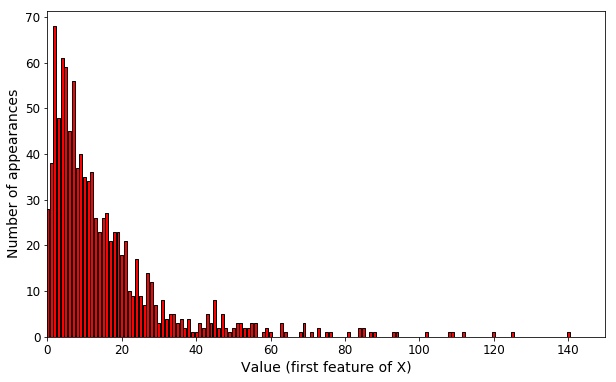

In [76]:
bins = np.bincount(X[:, 0])

plt.figure(figsize=(10, 6))
plt.bar(range(len(bins)), bins, color="r", edgecolor="k")
plt.xlabel("Value (first feature of X)")
plt.ylabel("Number of appearances")
plt.xlim(0, X[:, 0].max()+10)
plt.show()

第二个特征取值：

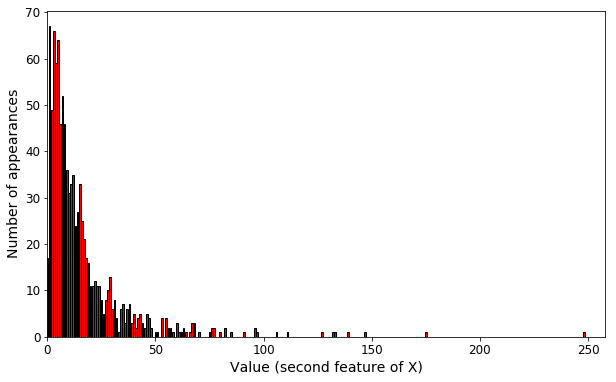

In [83]:
bins = np.bincount(X[:, 1])

plt.figure(figsize=(10, 6))
plt.bar(range(len(bins)), bins, color="r", edgecolor="k")
plt.xlabel("Value (second feature of X)")
plt.ylabel("Number of appearances")
plt.xlim(0, X[:, 1].max()+10)
plt.show()

第三个特征取值：

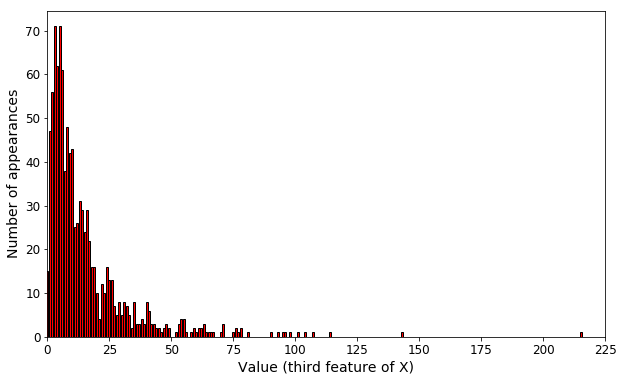

In [101]:
bins = np.bincount(X[:, 2])

plt.figure(figsize=(10, 6))
plt.bar(range(len(bins)), bins, color="r", edgecolor="k")
plt.xlabel("Value (third feature of X)")
plt.ylabel("Number of appearances")
plt.xlim(0, X[:, 2].max()+10)
plt.show()

> **泊松分布**：这种类型的数值分布（许多较小的值和一些非常大的值）在实践中非常常见。大多数线性模型无法很好地处理这种数据。

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ridge = Ridge(random_state=42).fit(X_train, y_train)
print("Score on test set: {:.4f}".format(ridge.score(X_test, y_test)))

Score on test set: 0.6116


> Ridge无法真正捕捉X和y的关系。

对数据应用`log`变换：

In [90]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

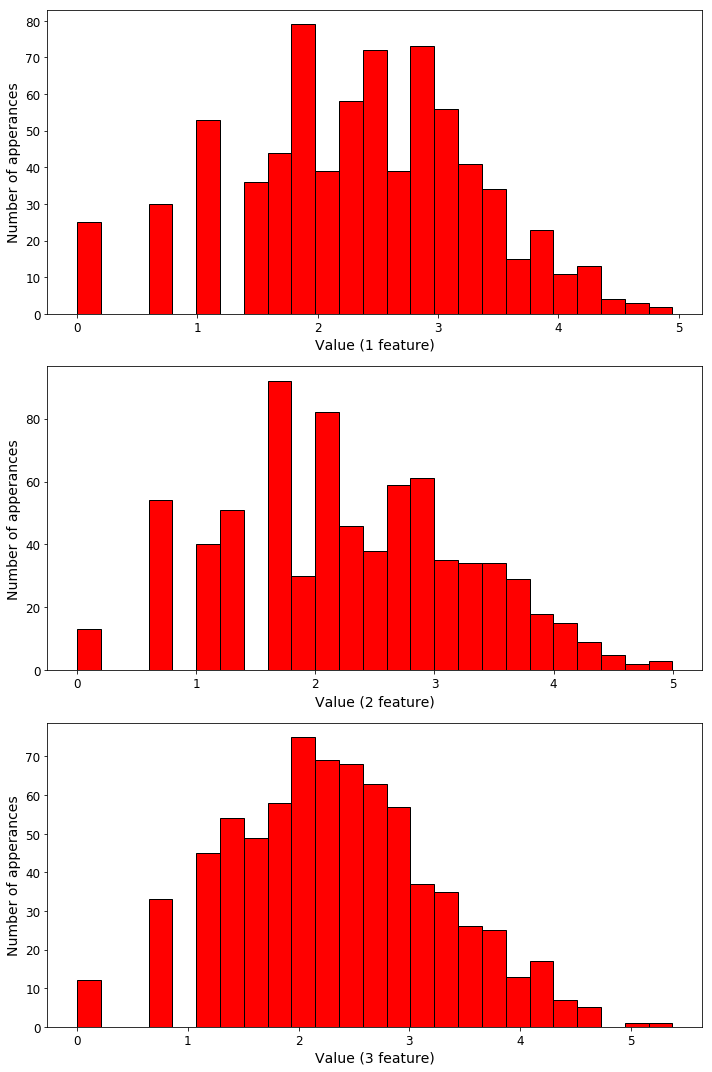

In [102]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, ax in enumerate(axes.ravel()):
    ax.hist(X_train_log[:, i], bins=25, color="r", edgecolor="k")
    ax.set_xlabel("Value ({} feature)".format(i+1))
    ax.set_ylabel("Number of apperances")
fig.tight_layout()

> 变换之后，数据分布的不对称性变小，也不再有非常大的异常值。

In [93]:
ridge = Ridge(random_state=42).fit(X_train_log, y_train)
print("Score on test set: {:.4f}".format(ridge.score(X_test_log, y_test)))

Score on test set: 0.8807


本例中，所有特征都具有相同的性质，这在实践中非常少见。通常来说，**只有一部分特征应该进行变换，有时每个特征的变换方式也各不相同**。**对于基于树的模型，这种变换并不重要，但对线性模型可能至关重要。**

对**回归的目标变量y进行变换**有时也是一个好主意。**尝试预测计数（如订单数量）**是一种相当常见的任务，而且**使用`log(y+1)`变换往往有用**（这是对泊松分布非常粗略的近似，而从概率的角度来看，这是正确的解决方法）。

**总结：**
1. 分箱、多项式和交互式特征都对模型在给定数据集上的性能有很大影响，对于复杂度低的模型更是这样，比如线性模型和NB。
2. 基于树的模型通常能够自己发现重要的交互项，大多数情况下不需要显示地变换数据。
3. 其他模型，如SVM、最近邻和神经网络，有时可能会从分箱、交互式或多项式中受益，但其效果通常不如线性模型那么明显。

## 5 自动化选择特征

在添加新特征或处理一般的高维数据集时，最好将特征的数量减少到只包含最有用的那些特征，并删除其余特征。

**如何判读每个特征的作用：**
1. 单变量统计（univariate statistics）
2. 基于模型的选择（model-based selection）
3. 迭代选择（iterative selection）

都是监督方法，需要目标值来拟合模型。需要将数据划分为训练集和测试集，并只在训练集上拟合特征选择。

### 5.1 单变量统计

计算每个特征和目标值之间的关系是否存在统计显著性，然后选择具有最高置信度的特征。**单变量**意味着只单独考虑每个特征，如果一个特征只有与另一个特征合并时才具有信息量，那么这个特征将被舍弃。

单变量测试的计算速度通常很快，并且不需要构建模型，而且完全独立于特征选择之后应用的模型。

对于分类问题，这被称为**方差分析（analysis of variance, ANOVA)**。

使用cancer数据集，并添加一些没有信息量的噪声特征，期望特征选择能够识别没有信息量的特征并删除它们：

In [104]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

向cancer数据集中添加噪声特征：

In [106]:
cancer = load_breast_cancer()

# Get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# Add noise features to the data
# 前30个特征来自数据集，后50个特征来自噪声
X_w_noise = np.hstack((cancer.data, noise))

In [108]:
print("shape of cancer.data: {}".format(cancer.data.shape))
print("shape of cancer.data with noise: {}".format(X_w_noise.shape))

shape of cancer.data: (569, 30)
shape of cancer.data with noise: (569, 80)


In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, test_size=0.5, random_state=0)

+ 使用`SelectPercentile`选择50%的特征：

In [110]:
# Use f_classify (the default) and SelectPercentile to select 50% of features:
select_per = SelectPercentile(percentile=50)
select_per.fit(X_train, y_train)
X_train_selected = select_per.transform(X_train)

In [111]:
print("X_train shape: {}".format(X_train.shape))
print("X_train_selected shape: {}".format(X_train_selected.shape))

X_train shape: (426, 80)
X_train_selected shape: (426, 40)


> 特征的数量由80减少到40（50%）。

In [112]:
# Scores of feature
select_per.scores_

array([  4.40180997e+02,   8.95536791e+01,   4.75274144e+02,
         3.85680473e+02,   6.74218493e+01,   2.18542852e+02,
         3.72984757e+02,   6.35900176e+02,   6.40493267e+01,
         3.28353547e-01,   1.78863006e+02,   1.33493222e-01,
         1.64010897e+02,   1.52526596e+02,   9.69579131e-01,
         3.13721485e+01,   2.71112159e+01,   7.86936994e+01,
         2.76843750e-01,   1.14922143e+00,   5.87643394e+02,
         1.19957407e+02,   6.15865212e+02,   4.48950619e+02,
         8.99842621e+01,   2.10344162e+02,   3.33433403e+02,
         6.89401558e+02,   1.03347098e+02,   3.89543271e+01,
         3.37166835e-01,   2.30055199e-01,   2.36650763e-01,
         3.04778089e+00,   5.47171549e-02,   4.78163298e+00,
         2.52994036e+00,   1.58391898e+00,   3.99933145e-02,
         3.49383389e+00,   3.33487973e-02,   1.52244931e+00,
         3.78705807e-01,   8.00604697e+00,   3.02165350e-01,
         1.13570635e-01,   1.56344495e-02,   8.92319884e-01,
         1.80563997e-01,

In [113]:
# p-values of feature scores
select_per.pvalues_

array([  1.49580122e-67,   2.08888547e-19,   3.17691243e-71,
         1.53813668e-61,   2.66902297e-15,   3.52001857e-40,
         4.42473807e-60,   2.20623168e-86,   1.17414864e-14,
         5.66933949e-01,   2.78405029e-34,   7.15019484e-01,
         5.68228030e-32,   3.81775957e-30,   3.25346709e-01,
         3.83665553e-08,   3.00125745e-07,   2.04448875e-17,
         5.99052537e-01,   2.84321981e-01,   4.37489449e-82,
         9.43065659e-25,   1.26903853e-84,   1.75060866e-68,
         1.74547625e-19,   5.42424954e-39,   2.21523191e-55,
         6.35098115e-91,   7.15985335e-22,   1.05317359e-09,
         5.61777647e-01,   6.31730213e-01,   6.26886990e-01,
         8.15718462e-02,   8.15162329e-01,   2.93106734e-02,
         1.12449724e-01,   2.08889634e-01,   8.41589532e-01,
         6.22869232e-02,   8.55186196e-01,   2.17932714e-01,
         5.38626841e-01,   4.88354640e-03,   5.82817530e-01,
         7.36281820e-01,   9.00552892e-01,   3.45387385e-01,
         6.71104554e-01,

`get_support`方法查看被哪些特征被选择：

In [114]:
mask_per = select_per.get_support()
mask_per

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True], dtype=bool)

基于测试中的p-value来选择舍弃特征——使用阈值（保留50%）来舍弃所有p-value过大的特征（意味着它们不可能与目标值相关）。

+ 使用`SelectKBest`选择50%的特征：

In [120]:
# Use f_classify (the default) and SelectKBest to select 50%(40) of features:
select_k_best = SelectKBest(k=40)
select_k_best.fit(X_train, y_train)
X_train_selected = select_k_best.transform(X_train)

In [121]:
print("X_train shape: {}".format(X_train.shape))
print("X_train_selected shape: {}".format(X_train_selected.shape))

X_train shape: (426, 80)
X_train_selected shape: (426, 40)


> 选择40个特征。

In [122]:
select_k_best.scores_

array([  4.40180997e+02,   8.95536791e+01,   4.75274144e+02,
         3.85680473e+02,   6.74218493e+01,   2.18542852e+02,
         3.72984757e+02,   6.35900176e+02,   6.40493267e+01,
         3.28353547e-01,   1.78863006e+02,   1.33493222e-01,
         1.64010897e+02,   1.52526596e+02,   9.69579131e-01,
         3.13721485e+01,   2.71112159e+01,   7.86936994e+01,
         2.76843750e-01,   1.14922143e+00,   5.87643394e+02,
         1.19957407e+02,   6.15865212e+02,   4.48950619e+02,
         8.99842621e+01,   2.10344162e+02,   3.33433403e+02,
         6.89401558e+02,   1.03347098e+02,   3.89543271e+01,
         3.37166835e-01,   2.30055199e-01,   2.36650763e-01,
         3.04778089e+00,   5.47171549e-02,   4.78163298e+00,
         2.52994036e+00,   1.58391898e+00,   3.99933145e-02,
         3.49383389e+00,   3.33487973e-02,   1.52244931e+00,
         3.78705807e-01,   8.00604697e+00,   3.02165350e-01,
         1.13570635e-01,   1.56344495e-02,   8.92319884e-01,
         1.80563997e-01,

In [123]:
select_k_best.pvalues_

array([  1.49580122e-67,   2.08888547e-19,   3.17691243e-71,
         1.53813668e-61,   2.66902297e-15,   3.52001857e-40,
         4.42473807e-60,   2.20623168e-86,   1.17414864e-14,
         5.66933949e-01,   2.78405029e-34,   7.15019484e-01,
         5.68228030e-32,   3.81775957e-30,   3.25346709e-01,
         3.83665553e-08,   3.00125745e-07,   2.04448875e-17,
         5.99052537e-01,   2.84321981e-01,   4.37489449e-82,
         9.43065659e-25,   1.26903853e-84,   1.75060866e-68,
         1.74547625e-19,   5.42424954e-39,   2.21523191e-55,
         6.35098115e-91,   7.15985335e-22,   1.05317359e-09,
         5.61777647e-01,   6.31730213e-01,   6.26886990e-01,
         8.15718462e-02,   8.15162329e-01,   2.93106734e-02,
         1.12449724e-01,   2.08889634e-01,   8.41589532e-01,
         6.22869232e-02,   8.55186196e-01,   2.17932714e-01,
         5.38626841e-01,   4.88354640e-03,   5.82817530e-01,
         7.36281820e-01,   9.00552892e-01,   3.45387385e-01,
         6.71104554e-01,

In [125]:
mask_k_best = select_k_best.get_support()
mask_k_best

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True], dtype=bool)

比较两种特征选择方法：

In [127]:
np.all(mask_per == mask_k_best)

True

Text(0.5,0,'Sample index')

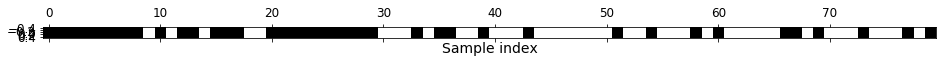

In [133]:
plt.matshow(mask_per.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

Text(0.5,0,'Sample index')

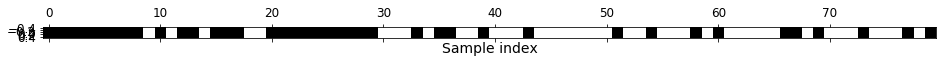

In [136]:
plt.matshow(mask_k_best.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

两种方法的选择的特征相同。大多数特征都是原始特征，并且大多数噪声特征都已被删除。但原始特征的还原并不完美。

In [137]:
X_test_selected = select_k_best.transform(X_test)

In [139]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42).fit(X_train, y_train)
print("Score with all features: {:.4f}".format(log_reg.score(X_test, y_test)))

log_reg = LogisticRegression(random_state=42).fit(X_train_selected, y_train)
print("Score with only selected features: {:.4f}".format(log_reg.score(X_test_selected, y_test)))

Score with all features: 0.9510
Score with only selected features: 0.9580


> 本例中，删除噪声特征可以提高性能，即使丢失了某些原始特征。但在真实数据上的结果可能更加复杂。

**如果特征量太大以至于无法构建模型，或者怀疑许多特征完全没有信息量，那么单变量特征选择还是非常有用的。**

### 5.2 基于模型的特征选择

使用一个监督学习模型来判断每个特征的重要性，并且仅保留最重要的特征。不需要与最终的模型相同。特征选择模型需要为每个特征提供某种重要性度量，以便用这个度量对特征进行排序。

基于模型的特征选择同时考虑所有特征，因此可以获得交互项（如果模型能获取的话）。

**要使用基于模型的特征选择，需要使用`SelectFromModel`变换器。**

In [145]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median')

`SelectFromModel`类选出重要性度量（由监督模型提供）大于给定`threshold`的所有特征。使用中位数作为`threshold`来选定一半特征。

**参数`estimator`必须有`feature_importances_`或`coef_`属性。**

In [146]:
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train shape: {}".format(X_train.shape))
print("X_train_selected shape: {}".format(X_train_selected.shape))

X_train shape: (426, 80)
X_train_selected shape: (426, 40)


Text(0.5,0,'Sample index')

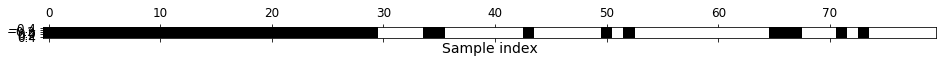

In [147]:
plt.matshow(select.get_support().reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")

In [150]:
X_test_selected = select.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_selected, y_train)
print("Score with model-based: {:.4f}".format(
    log_reg.score(X_test_selected, y_test)))

Score with model-based: 0.9580


### 5.3 迭代特征选择

**在迭代特征选择中，将会构建一系列模型，每个模型都使用不同数量的特征。所以成本更高。**
1. 开始时没有特征，然后逐个添加特征，直到满足某个终止条件；
2. 从所有特征开始，然后逐个删除特征，直到满足某个终止条件。

**递归特征消除（recursive feature elimination, RFE）**，从所有特征开始构建模型，并根据模型舍弃最不重要的特征，然后使用除被舍弃特征之外的所有特征来构建一个模型，如此继续，直到仅剩下预设数量的特征。用于选择的模型需要提供某种确定特征重要性的方法。

In [155]:
from sklearn.feature_selection import RFE

rfe_select = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)
rfe_select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

> 运行时间比基于模型的长，因为对一个随机森林模型运行40次。

Text(0.5,0,'Sample index')

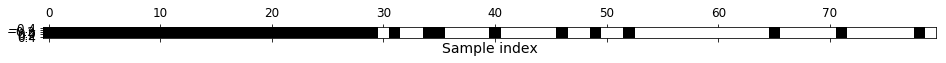

In [153]:
plt.matshow(select.get_support().reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")

In [156]:
X_train_rfe = rfe_select.transform(X_train)
X_test_rfe = rfe_select.transform(X_test)

score = LogisticRegression(random_state=42).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Score with RFE: {:.4f}".format(score))

Score with RFE: 0.9580


In [158]:
rfe_select.score(X_test, y_test)

0.97202797202797198

In [159]:
# The external estimator fit on the reduced dataset
rfe_select.estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [160]:
# The number of selected features
rfe_select.n_features_

40

In [162]:
# The mask of selected features
rfe_select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False], dtype=bool)

特征排名，第i个值代表第i个特征的排名。被选中的特征排名为1。

In [163]:
rfe_select.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 15,  1, 35, 39,
        1,  1, 24, 28, 25, 37,  1, 41, 31, 29,  7, 33,  1, 17,  2,  1, 10,
        5,  1, 27,  3, 14, 12,  9, 23,  6, 16,  4, 11, 40, 19,  1, 22, 20,
       26, 34, 32,  1, 18,  8, 30, 38, 36, 21,  1, 13])

### 5.4 总结

+ 在单变量测试中，没有使用模型
+ 在基于模型的特征选择中，使用了单个模型
+ 在迭代特征选择中，构建一系列模型，每个模型都使用不同数量的特征。

如果不确定何时选择哪些特征作为ML的输入，那么自动化特征选择可能特别有用。
1. 减少所需要的特征数量
2. 加快预测速度
3. 允许可解释性更强的模型

**但在大多数现实情况中，使用特征选择不太可能大幅提升性能。**

## 6 利用专家知识

机器学习的目的时避免创建一组专家设计的规则，但这并不意味着应该舍弃该应用领域的先验知识。通常来说，领域专家可以帮助找出有用的特征，其信息量比数据原始要大得多。

数据集Citi Bike。想要解决的任务是给定日期和时间，预测有多少人将会租一辆自行车。

In [167]:
citibike = pd.read_csv("citibike.csv")

将数据重采样为每3小时一个数据，以得到每一天的主要趋势：

In [176]:
citibike ['one'] = 1
citibike ['starttime'] = pd.to_datetime(citibike .starttime)
data_starttime = citibike .set_index("starttime")
data_resampled = data_starttime.resample("3h").sum().fillna(0)

dataset = data_resampled.one
dataset = dataset.astype("float64")

In [177]:
dataset.head()

starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64

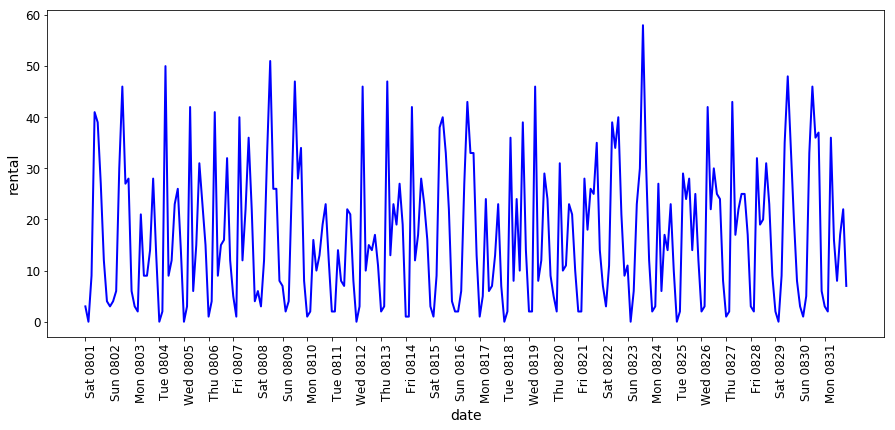

In [195]:
plt.figure(figsize=(15, 6))
xticks = pd.date_range(dataset.index.min(), dataset.index.max(), freq="D")
plt.xticks(xticks, xticks.strftime("%a %m%d"), rotation=90, ha="left")
plt.plot(dataset, c='b', linewidth=2)
plt.xlabel("date")
plt.ylabel("rental")
plt.show()

In [185]:
# Convert to POSIX time by dividing by 10**9
X = dataset.index.astype("int64").values.reshape(-1, 1) // 10**9
y = dataset.values

In [186]:
X.shape

(248, 1)

定义一个函数，将数据集划分为训练集和测试集，构建模型并可视化：

In [222]:
# 使用前184个数据点用于训练
n_train = 184

def eval_on_features(X, target, regressor):
    """对给定特征集上的回归进行评估和作图。"""
    X_train, X_test = X[:n_train], X[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test set R^2: {:.4f}".format(regressor.score(X_test, y_test)))

    y_pred_test = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(16, 6))
    plt.plot(range(n_train), y_train, label="train", c="r")
    plt.plot(range(n_train, len(X)), y_test, "-", label="test")
    plt.plot(range(n_train), y_pred_train, "b--", label="train predicted")
    plt.plot(range(n_train, len(X)), y_pred_test, "--", label="test predicted")
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m%d"),
               rotation=90, ha="left")
    plt.legend(loc=(1.01, 0), fontsize="x-large")
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test set R^2: -0.0845


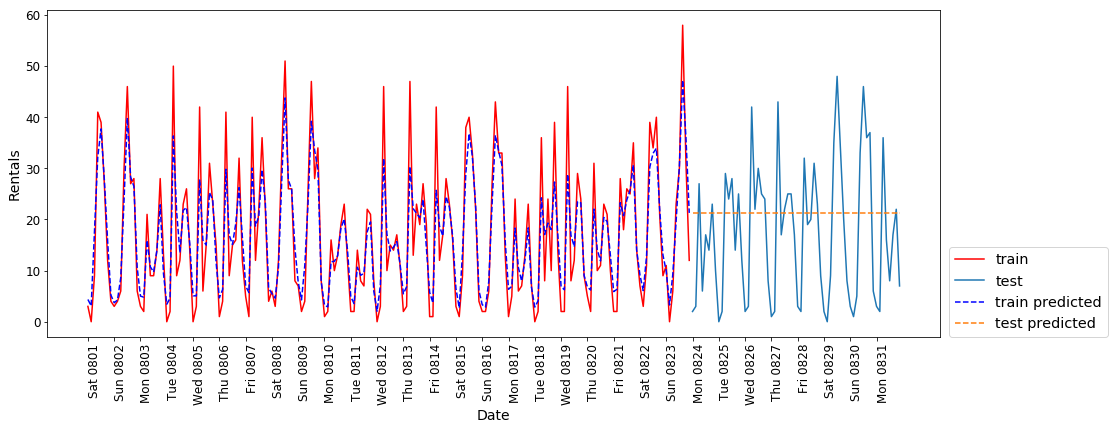

In [223]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
eval_on_features(X, y, rf_reg)
plt.show()

> 在训练集上预测结果很好，符合随机森林的表现。对测试集来说，是一条直线，$R^2=-0.0845$，说明什么也没学到。

测试集上结果是一条直线问题在于特征和随机森林的组合。树及所有基于树的模型都无法外推到训练集之外的特征范围。结果就是模型只能预测训练集中最后一个数据点的目标值。

观察发现：一天内的时间和一周的星期几很重要。来添加这两个特征。——”专家知识“。

从POSIX中学不到任何东西，所有删掉这个特征。

+ 仅使用每天的时刻：

In [224]:
X_hour = dataset.index.hour.values.reshape(-1, 1)

Test set R^2: 0.6024


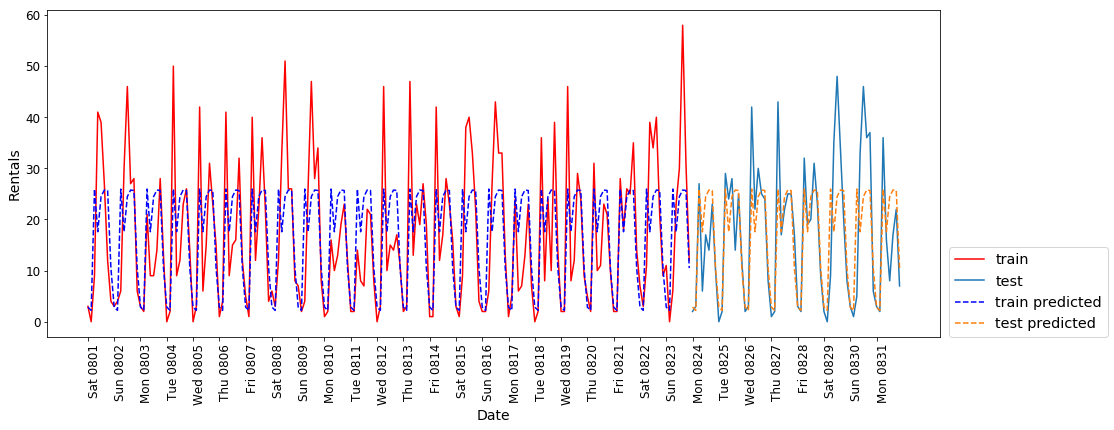

In [225]:
eval_on_features(X_hour, y, rf_reg)

> 预测结果没有抓住每周的趋势。

+ 添加一周的星期几做为特征：

In [226]:
X_hour_week = np.hstack((dataset.index.hour.values.reshape(-1, 1),
                         dataset.index.dayofweek.values.reshape(-1, 1)))

In [229]:
X_hour_week[:5]

array([[ 0,  5],
       [ 3,  5],
       [ 6,  5],
       [ 9,  5],
       [12,  5]], dtype=int64)

Test set R^2: 0.8409


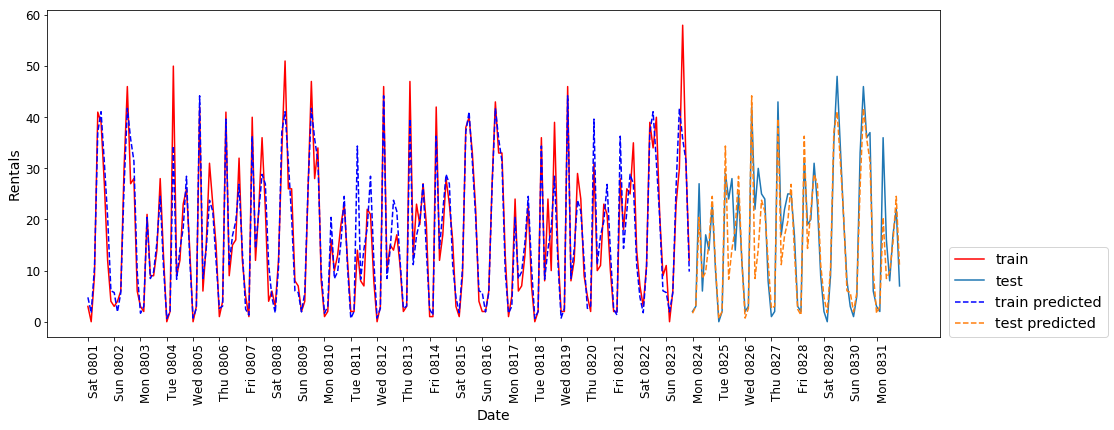

In [227]:
eval_on_features(X_hour_week, y, rf_reg)

> 预测性能相当好。模型学到的可能是8月前23天中星期几与时刻每种组合的平均租车数量。

实际上不需要像随机森林这么复杂的模型，使用简单的模型——`LinearRegression`。

Test set R^2: 0.1320


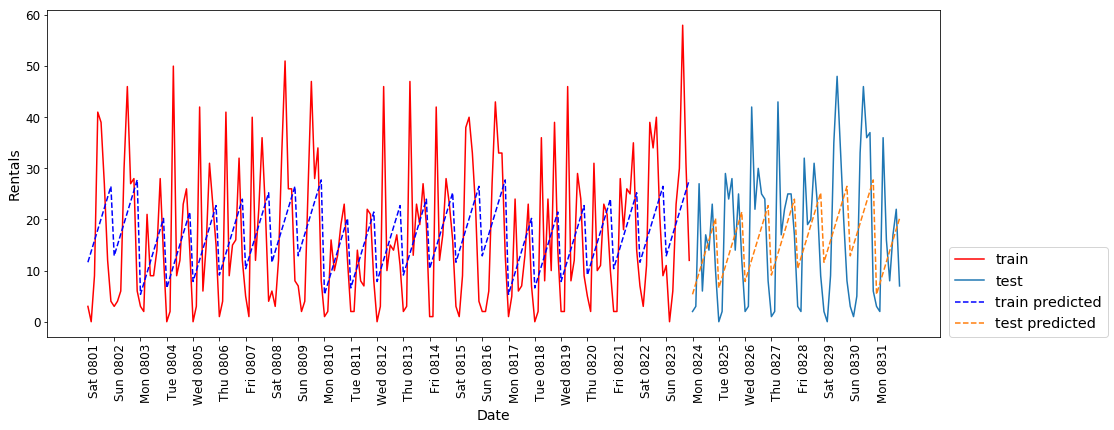

In [228]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

> 效果差得多，且**周期性模式看起来很奇怪**。其**原因在于**用整数编码每周的星期几和一天内的时间，它们被解释为连续变量。因此，线性模型只能学到关于每天时间的线性函数——时间越晚，租车量越大。

通过将整数解释为分类变量:

In [230]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder(sparse=False)
X_hour_week_onehot = one_hot_enc.fit_transform(X_hour_week)

Test set R^2: 0.6220


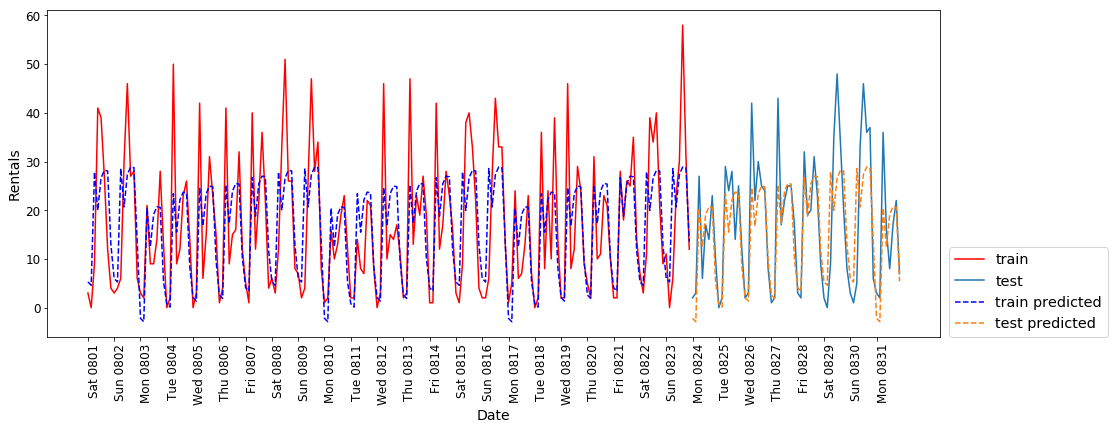

In [231]:
eval_on_features(X_hour_week_onehot, y, LinearRegression())

> 现在线性模型为一周内的每天都学到了一个系数，为一天内的每个时刻学到了一个系数。

利用交互特征，让模型为星期几和时刻的每一种组合学到一个系数：

In [233]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, interaction_only=True,
                                   include_bias=False)
X_hour_week_onehot_poly = poly_features.fit_transform(X_hour_week_onehot)

Test set R^2: 0.8452


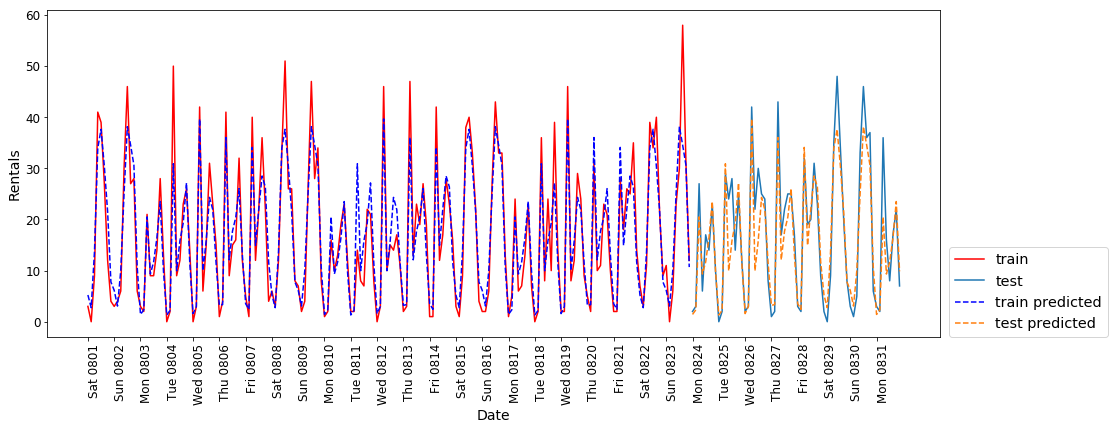

In [235]:
eval_on_features(X_hour_week_onehot_poly, y, Ridge(random_state=42))

> 性能与随机森林相似。但这个模型最大的优点：可以很清楚看到学到的内容——对每个星期几和时刻的交互学到了一个系数，可以将学到的系数作图，而这对随机森林来说不可能。